In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('pic.csv')


In [2]:
data=np.array(data)
m,n =data.shape
np.random.seed(42)
np.random.shuffle(data)

data_train=data[0:33600]
X_train=data_train[:,1:].astype(np.float32)
Y_train=data_train[:,0]
X_train/=255.

data_test=data[33600:m]
X_test=data_test[:, 1:].astype(np.float32)
Y_test=data_test[:,0]
X_test/=255.
data_train[:,0]

array([8, 1, 9, ..., 8, 5, 4], shape=(33600,))

In [3]:


# all activations + normal functions
def relu(x):
  return np.maximum(0, x)

def relu_der(x):
  return (x>0)
def softmax(x):
  e=np.exp(x-np.max(x, axis=1, keepdims=True))
  return e/np.sum(e, axis=1, keepdims=True)

def init_params():
    np.random.seed(42)

    w1=np.random.rand(784, 16)
    b1=np.random.rand(1, 16)
    w2=np.random.rand(16,10)
    b2=np.random.rand(1, 10)
    return w1, b1, w2, b2

def forward_pass(X, w1, b1, w2, b2):
    z1=np.dot(X, w1) +b1
    a1=relu(z1)
    z2=np.dot(a1, w2) + b2
    y=softmax(z2)
    return y

def onehot(Y, num_classes=10):
  m=Y.shape[0]
  onehot=np.zeros((m, num_classes))
  onehot[np.arange(m), Y]=1
  return onehot

def sigmoid(x):
   return(1/(np.exp(-x)))

print(relu(76))


76


In [4]:
import numpy as np
np.random.seed(42)

w1=np.random.rand(784, 16)
b1=np.random.rand(1, 16)
w2=np.random.rand(16,10)
b2=np.random.rand(1, 10)
print(w1)

[[0.37454012 0.95071431 0.73199394 ... 0.21233911 0.18182497 0.18340451]
 [0.30424224 0.52475643 0.43194502 ... 0.04645041 0.60754485 0.17052412]
 [0.06505159 0.94888554 0.96563203 ... 0.66252228 0.31171108 0.52006802]
 ...
 [0.65559395 0.54209651 0.7654985  ... 0.86395703 0.32135231 0.98956481]
 [0.15768867 0.51633982 0.79284453 ... 0.59166882 0.01265783 0.00120361]
 [0.61609856 0.18901707 0.19188755 ... 0.42615155 0.94584441 0.21772903]]


In [5]:
Y_onehot=onehot(Y_train)

In [ ]:
def train_model():
  epochs=2000
  alpha=0.1

  w1, b1, w2, b2=init_params()

  for i in range(epochs):
        z1=np.dot(X_train, w1)+ b1
        a1=relu(z1)
        z2=np.dot(a1, w2)+ b2
        y=softmax(z2)

        pred=np.argmax(y, axis=1)
        labels=np.argmax(Y_onehot, axis=1)
        acc=np.mean(pred==labels)
        loss = -(1/m) * np.sum(Y_onehot * np.log(y + 1e-8))

        dz2=y-Y_onehot
        dw2=(1/m)*np.dot( a1.T, dz2)
        db2=(1/m)*np.sum(dz2, axis=0, keepdims=True)
        dz1=relu_der(z1)*np.dot(dz2, w2.T)
        dw1=(1/m)*np.dot(X_train.T, dz1)
        db1=(1/m)*np.sum(dz1, axis=0, keepdims=True)



        w1-= alpha*dw1
        b1-= alpha*db1
        w2-= alpha*dw2
        b2-= alpha*db2


        if(i%100==0):
            print(f"epoch {i}:\n loss: {loss:.4f}\n accuracy: {acc:.4f}")
  return w1, w2, b1, b2

w1, w2, b1, b2=train_model()


epoch 0:
 loss: 13.2807
 accuracy: 0.0968
epoch 100:
 loss: 1.5454
 accuracy: 0.3489
epoch 200:
 loss: 1.1705
 accuracy: 0.5375


In [ ]:
def predict(X, w1, b1, w2, b2):
    y = forward_pass(X, w1, b1, w2, b2)
    preds = np.argmax(y, axis=1)
    return preds

def test_prediction(index, X, Y, w1, b1, w2, b2):
    x_input = X[index].reshape(1, -1)  # (1, 784)
    y_true = Y[index]

    pred = predict(x_input, w1, b1, w2, b2)[0]  # single number

    print(f"Prediction: {pred}")
    print(f"Actual Label: {y_true}")

    # Reshape back to image
    img = x_input.reshape(28, 28)
    plt.imshow(img, cmap='gray')
    plt.title(f"Predicted: {pred} | Actual: {y_true}")
    plt.axis('off')
    plt.show()

Prediction: 3
Actual Label: 3


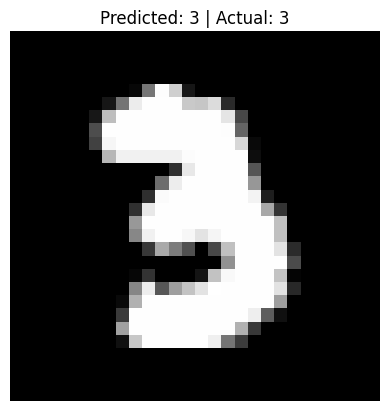

In [ ]:
test_prediction(8, X_test,  Y_test, w1, b1, w2,b2)